In [9]:
%matplotlib notebook
#%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import sys 
# map met de 'productietools' toevoegen in zoekpad
sys.path.append("g:/O en M/01. Projecten/Projecten lopend/Python Scripts/productietools/")
#script met onze eigen FEWS import routines
import fewsWAM

from scipy.optimize import curve_fit


In [10]:
def get_time_series(par_ids, loc_ids, filter_id, modinst_id, start, end):
    """Get a timeseries with a query from the FEWS database using fewsWAM
    
    Parameters
    ----------
    par_ids : str
    loc_ids : str
    filter_id : str
    start : datetime
    end : datetime
    """
    source_data = fewsWAM.get_fews_dict(
        location_id=loc_ids,
        parameter_id=par_ids,
        filter_id=filter_id,
        modinst_id = modinst_id,
        start_time=start,
        end_time=end,
    )

    if source_data:

        reeks = fewsWAM.series_from_dict(source_data)

    return reeks

Lijst met locatie en bijbehorende parameter, filter en module ID in csv bestand zetten en inlezen

In [11]:
lijst = pd.read_csv('g:/O en M/01. Projecten/Projecten lopend/Python Scripts/Dynamisch Beekdal/lijst_debietmeetpunten.csv', sep = ';')
lijst

Location_ID Parameter_ID     Filter_ID         Module_ID  \
0                     ADCP211     Q.meting  Hydronet_Uur    Aggregeren_uur   
1                      ADM120     Q.meting  Hydronet_Uur    Aggregeren_uur   
2                        201B   Q.afgeleid  Hydronet_Uur    Aggregeren_uur   
3   RWSPoeldonk_debiet_totaal   Q.afgeleid  Hydronet_RWS  Debiet_Berekenen   
4                    ADCP202A     Q.meting  Hydronet_Uur    Aggregeren_uur   
5                201B_beneden     H.meting  Hydronet_Uur    Aggregeren_uur   
6            206PLD_uitstroom     H.meting  Hydronet_Uur    Aggregeren_uur   
7                   DYNA025_O     H.meting  Hydronet_Uur    Aggregeren_uur   
8                   DYNA026_O     H.meting  Hydronet_Uur    Aggregeren_uur   
9                   DYNA027_O     H.meting  Hydronet_Uur    Aggregeren_uur   
10               211A_beneden     H.meting  Hydronet_Uur    Aggregeren_uur   
11                204B_debiet   Q.afgeleid  Hydronet_Uur    Aggregeren_uur   

    aggregate  
0       False  
1       False  
2       False  
3        True  
4       False  
5       False  
6       False  
7       False  
8       False  
9       False  
10      False  
11      False

Data inladen. Poeldonk is minuut data dus moet nog geresampled worden. Dit wordt met een True or falFalse aangegeven in de kolom "aggregate".
Resultaat data is een dictionary.

In [12]:
data = {}
start = pd.datetime(2015,1,1)
end = pd.datetime(2020,6,1)

for _,row in lijst.iterrows():
    print(row['Location_ID'])
    datain = get_time_series(row['Parameter_ID'],row['Location_ID'],row['Filter_ID'],row['Module_ID'], start,end)
    if row['aggregate']:
        datain = datain.resample('H').mean()
    try:
        data[row['Location_ID']] = datain['value']
    except:
        pass
Data = pd.DataFrame(data)       

ADCP211
ADM120
201B
RWSPoeldonk_debiet_totaal
ADCP202A
201B_beneden
206PLD_uitstroom
DYNA025_O
DYNA026_O
DYNA027_O
211A_beneden
204B_debiet


Dictionary "data" omzetten naar dataFrame "Data". 

In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47156 entries, 2015-01-01 00:00:00 to 2020-05-18 19:00:00
Freq: H
Data columns (total 12 columns):
ADCP211                      45818 non-null float32
ADM120                       45694 non-null float32
201B                         46093 non-null float32
RWSPoeldonk_debiet_totaal    45257 non-null float32
ADCP202A                     21801 non-null float32
201B_beneden                 46096 non-null float32
206PLD_uitstroom             39151 non-null float32
DYNA025_O                    16918 non-null float32
DYNA026_O                    18423 non-null float32
DYNA027_O                    20865 non-null float32
211A_beneden                 47012 non-null float32
204B_debiet                  46821 non-null float32
dtypes: float32(12)
memory usage: 2.5 MB


In [14]:
Data['In'] = Data[['ADCP211', '201B']].sum(axis=1)
Data['Uit'] = Data['ADM120']-Data[['204B_debiet','RWSPoeldonk_debiet_totaal']].sum(axis=1)
Data['year'] = Data.index.year

Middels onderstaande stukje script kun je de Q-H relaties plotten. Je moet wel zelf nog de gewenste locaties en jaren invoeren.

<IPython.core.display.Javascript object>


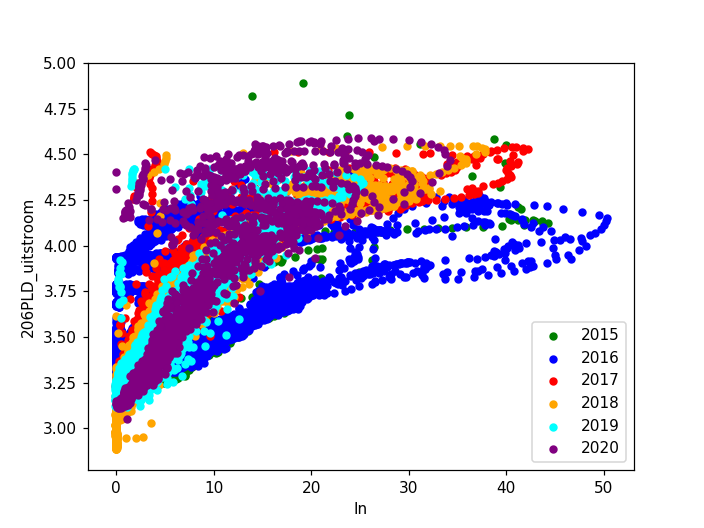

In [32]:
fig,ax = plt.subplots()
kleuren = ['green','blue','red','orange','cyan', 'purple']
tel = 0
for yy in ['2015','2016','2017','2018', '2019', '2020']:
    Data.loc[str(yy),['206PLD_uitstroom','In']].plot.scatter(x='In', y='206PLD_uitstroom', ax=ax, color = kleuren[tel], label = yy)
    tel+=1
plt.legend()